In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True, font_scale=1)
# sns.set_style('white')
sns.set_palette('deep')

# **1. Introduction to Decision Tree algorithm** <a class="anchor" id="1"></a>


A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes. 


A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node. 


We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-

1. At the beginning, the whole training set is considered as the root.
2. Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
3. Records are distributed recursively on the basis of attribute values.
4. Order to placing attributes as root or internal node of the tree is done by using some statistical approach.


I will describe Decision Tree terminology in later section.


### Decision Tree algorithm terminology** <a class="anchor" id="3"></a>


- In a Decision Tree algorithm, there is a tree like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from the root node to leaf node represent classification rules.

- We can see that there is some terminology involved in Decision Tree algorithm. The terms involved in Decision Tree algorithm are as follows:-


## **Root Node**

- It represents the entire population or sample. This further gets divided into two or more homogeneous sets.


## **Splitting**

- It is a process of dividing a node into two or more sub-nodes.


## Decision Node

- When a sub-node splits into further sub-nodes, then it is called a decision node.


## Leaf/Terminal Node

- Nodes that do not split are called Leaf or Terminal nodes.


## Pruning

- When we remove sub-nodes of a decision node, this process is called pruning. It is the opposite process of splitting.


## Branch/Sub-Tree

- A sub-section of an entire tree is called a branch or sub-tree.


## Parent and Child Node

- A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent node. 


The above terminology is represented clearly in the following diagram:-

## **Entropy**

Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. **Information gain** is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. 

Entropy is represented by the following formula:-



![Entropy](http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png)



Here, **c** is the number of classes and **pi** is the probability associated with the ith class. 

## **Gini index**

![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)


Here, again **c** is the number of classes and **pi** is the probability associated with the ith class.

Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

Steps to Calculate Gini for a split

1.	Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).

2.	Calculate Gini for split using weighted Gini score of each node of that split.


In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.

### Diabetes Prediction

In [22]:
df=pd.read_csv('diabetes-1.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


**Problem Statemeent -  Make predictions whether the patient has diabetes or Not from the above dataset**

> **Here Outcome -  Target Vaiable**

In [23]:
#rename outcome column

df.rename(columns={'Outcome':'Diabetes'},inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [26]:
df.duplicated().sum()


0

In [27]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [28]:

df['Diabetes'].unique()

array([1, 0], dtype=int64)

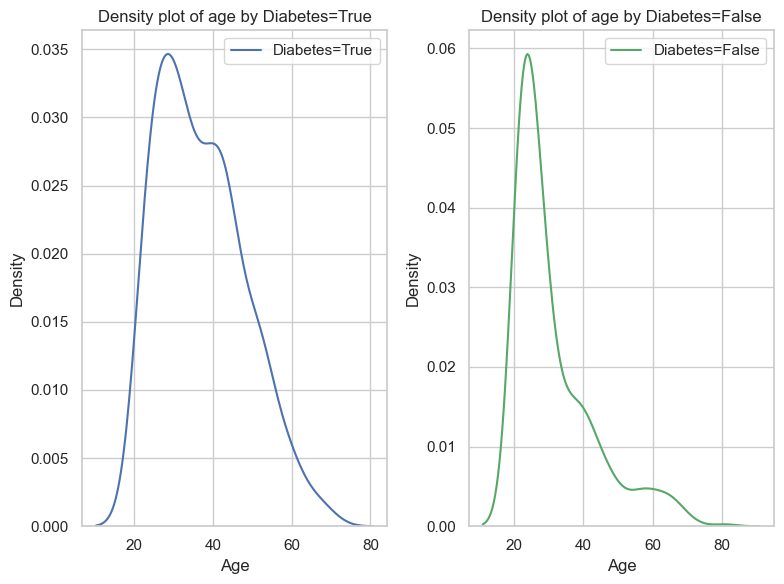

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,6))

sns.kdeplot(df[df['Diabetes']==1]['Age'],label='Diabetes=True',ax=ax1,color='b')
sns.kdeplot(df[df['Diabetes']==0]['Age'],label='Diabetes=False',ax=ax2,color='g')
ax1.legend()
ax2.legend()

ax1.set_title('Density plot of age by Diabetes=True')
ax2.set_title('Density plot of age by Diabetes=False')

plt.tight_layout()
plt.show()

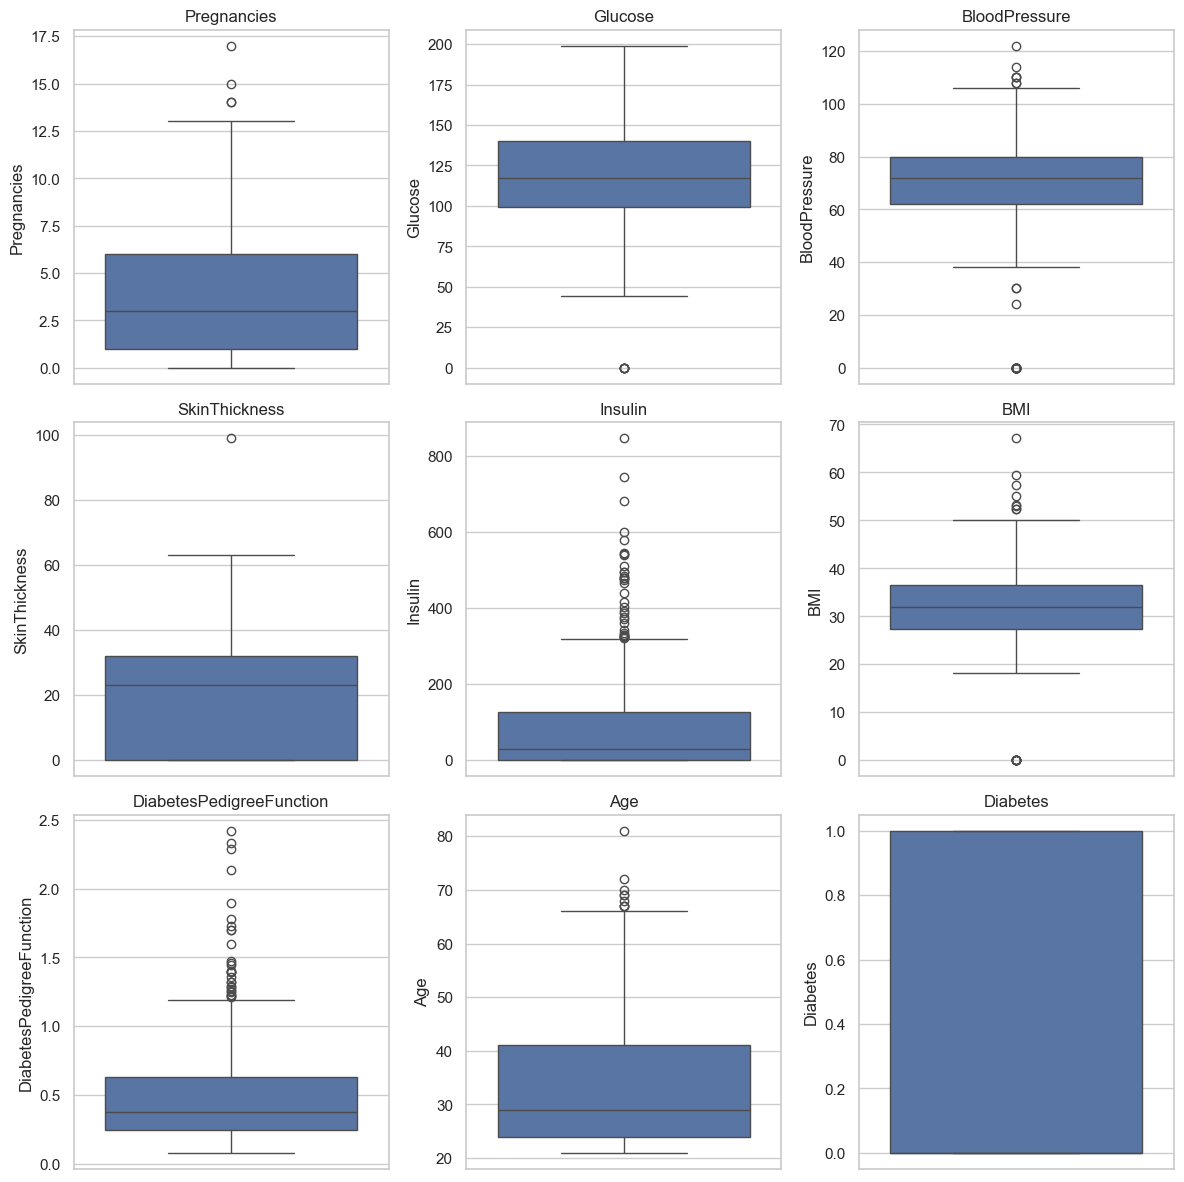

In [30]:
numeric_cols=df.select_dtypes(include='number').columns
num_cols=len(numeric_cols)
ncols=3
nrows=(num_cols+ncols-1)//ncols

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols*4,nrows*4))
axes=axes.flatten()

for ax,col in zip(axes,numeric_cols):
    sns.boxplot(y=df[col],ax=ax)
    ax.set_title(col)

for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

`Here we cannot remove outliers because some columns might have sensible high values compared to other columns
E.g: person Age can be low but BMI can be high `

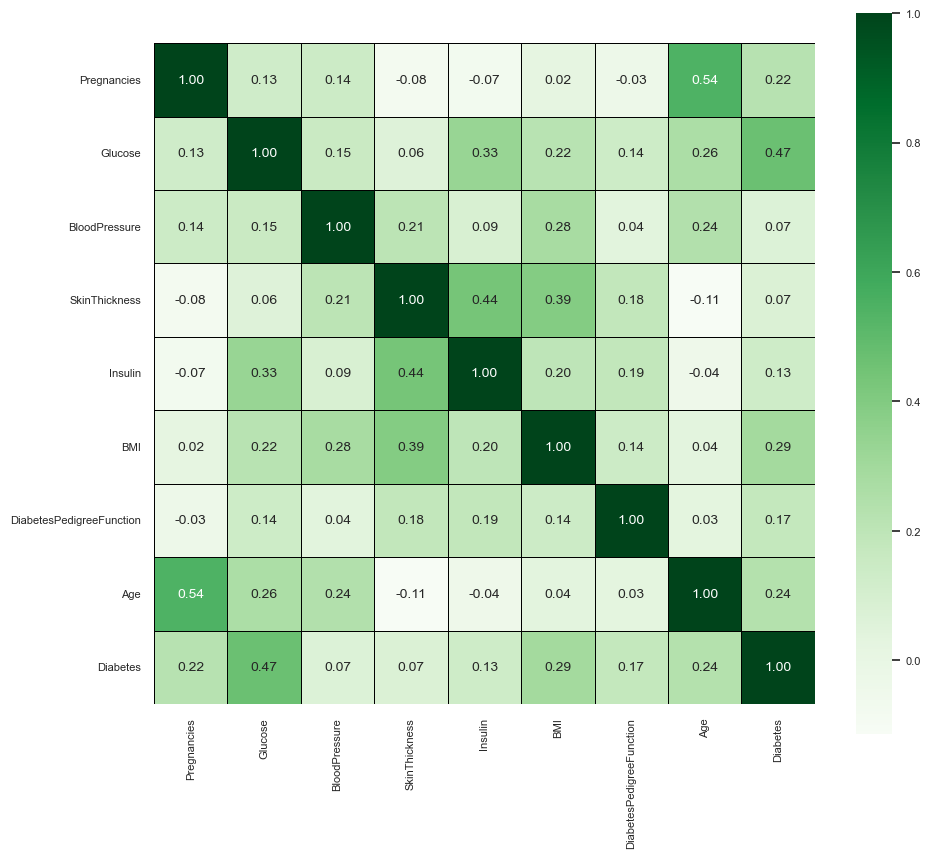

In [31]:
plt.rc('font', size=10)  
plt.rc('axes', titlesize=10)  
plt.rc('axes', labelsize=10)  
plt.rc('xtick', labelsize=8)  
plt.rc('ytick', labelsize=8)

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Greens',annot=True,linewidths=0.5, linecolor='black',fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.tight_layout()

* We can see that Glucose and diabetes column have high correlation

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
x=df.drop(columns=['Diabetes'])
y=df[['Diabetes']]

In [34]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=23)

### Decision Tree Classifier with criterion Gini

In [35]:
from sklearn.tree import DecisionTreeClassifier

clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=23)

clf_gini.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, random_state=23)

In [36]:
y_predict=clf_gini.predict(xtest)
y_predict

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(ytest, y_predict)))

Model accuracy score with criterion gini index: 0.7359


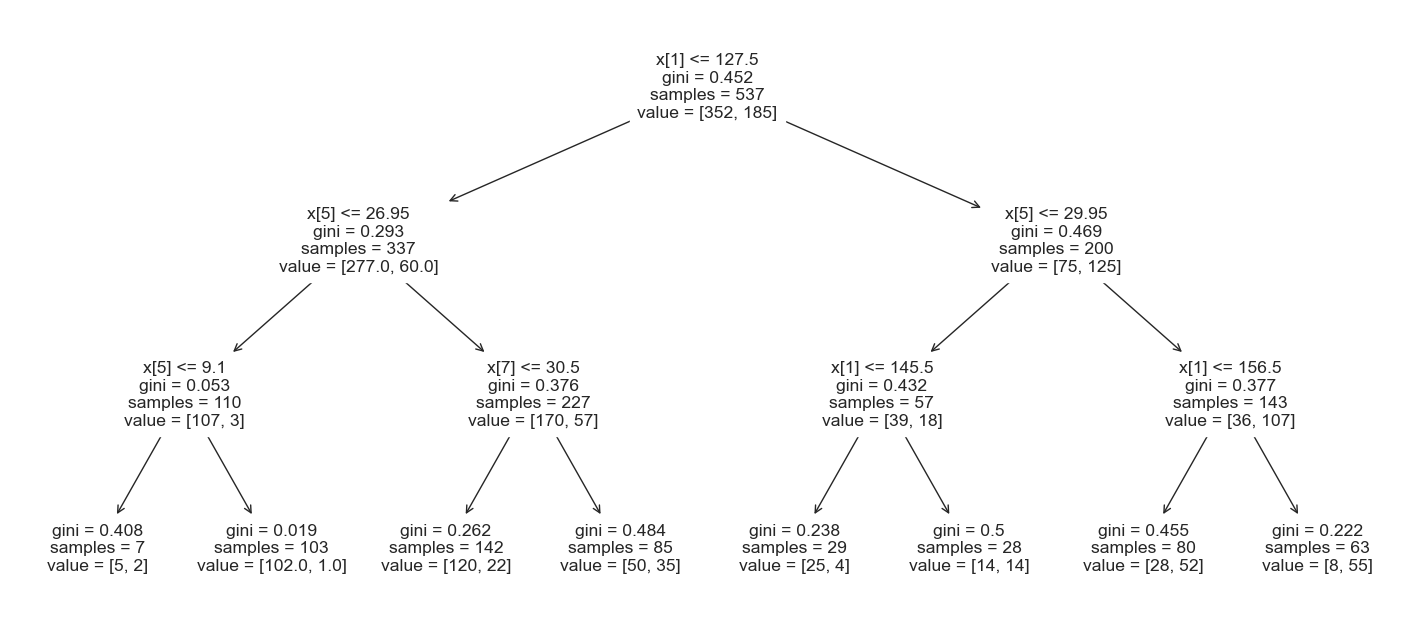

In [38]:
#vizualize the tree

plt.figure(figsize=(18,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(xtrain,ytrain));


---

### General Structure of the Tree:
- **Root Node (Top)**: 
  - This Node represents the entire dataset.
  - The first splitting condition is based on `x[1] <= 127.5`, where `x[1]` corresponds to the **Glucose** feature.
  - Here `x[n]` represents the column index from xtrain.

- **Internal Nodes**:
  - These nodes represent decision points where the dataset is further split based on the feature values and thresholds.
  - Each node shows:
    - **Splitting Feature and Threshold**: The condition used to split (e.g., `x[5] <= 26.95`).
    - **Gini Index**: Measures the impurity of the node. A lower Gini index indicates least impurity nodes.
    - **Samples**: The number of samples (rows) in that node.
    - **Value**: Distribution of classes in that node ([count of class 0, count of class 1]).

- **Leaf Nodes (Bottom)**:
  - Nodes where no further splits occur.
  - Represent the final classification for the samples that reach that node.

---

### Specific Explanation of the Tree:

#### Root Node:
- `x[1] <= 127.5` (Glucose column level):
  - **Gini** = 0.452, which indicates moderate impurity.
  - **Samples** = 537 (total number of rows in the dataset).
  - **Value** = [352, 185], meaning 352 samples are class 0 (non-diabetic), and 185 samples are class 1 (diabetic).

The data is split into two branches:
1. **Left Branch**: Glucose ≤ 127.5.
2. **Right Branch**: Glucose > 127.5.

---

#### Left Subtree (`x[1] <= 127.5`):
- Next splitting happens based on `x[5] <= 26.95` (BMI).

##### Node: `x[5] <= 26.95`:
- **Gini** = 0.293, showing lower impurity compared to the root node.
- **Samples** = 337.
- **Value** = [277, 60], meaning most samples here are class 0.

Further splits:
1. **Left Branch**: BMI ≤ 26.95.
2. **Right Branch**: BMI > 26.95.

---

#### Right Subtree (`x[1] > 127.5`):
- Next splitting happens based on `x[5] <= 29.95` (BMI).

##### Node: `x[5] <= 29.95`:
- **Gini** = 0.469.
- **Samples** = 200.
- **Value** = [75, 125], meaning this subset contains more class 1 (diabetic) samples.

Further splits:
1. **Left Branch**: BMI ≤ 29.95.
2. **Right Branch**: BMI > 29.95.


<Axes: >

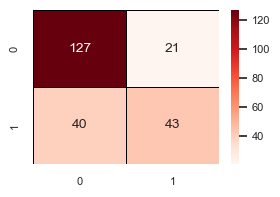

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_predict)

plt.figure(figsize=(3,2))

sns.heatmap(cm,annot=True,cmap="Reds",fmt='d',linewidths=0.5,linecolor='black')

<div class="alert alert-block alert-success">
    <b>
      * <code> True Positive:</code> The number of times our actual positive values are equal to the predicted positive. You predicted a positive value, and it is correct.
    <br>
    * <code>False Positive:</code> The number of times our model wrongly predicts negative values as positives. You predicted a negative value, and it is actually positive.
        <br>
    * <code>True Negative</code>: The number of times our actual negative values are equal to predicted negative values. You predicted a negative value, and it is actually negative.
            <br>
    * <code>False Negative:</code> The number of times our model wrongly predicts negative values as positives. You predicted a negative value, and it is actually positive. 
        </b>
 </div>
 
 
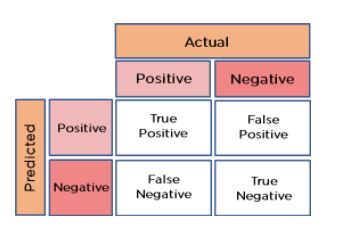

### Decision Tree Classifier with criterion entropy

In [40]:
from sklearn.tree import DecisionTreeClassifier


In [41]:
clf_en=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=34)
clf_en.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=34)

In [42]:
y_predict=clf_en.predict(xtest)

In [43]:
y_predict

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion Entropy index: {0:0.4f}'. format(accuracy_score(ytest, y_predict)))

Model accuracy score with criterion Entropy index: 0.7359


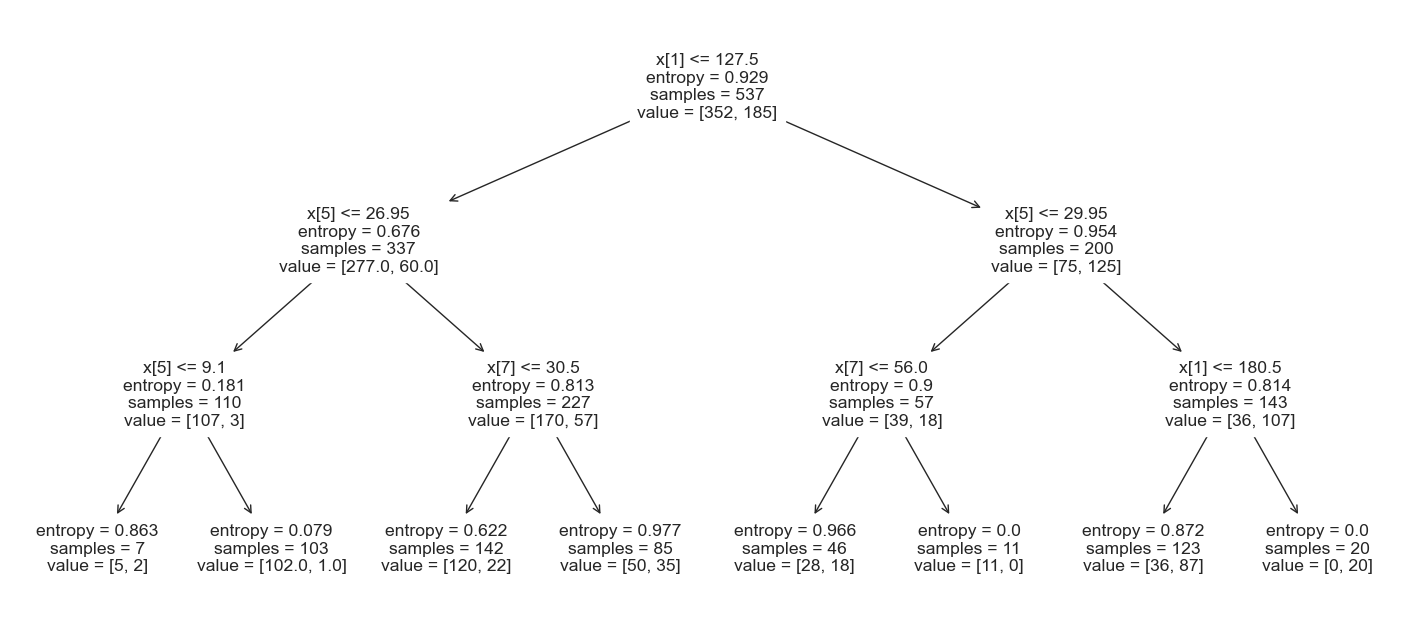

In [44]:
#vizualize the tree

plt.figure(figsize=(18,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(xtrain,ytrain));

<Axes: >

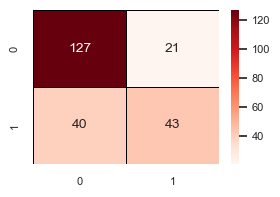

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_predict)

plt.figure(figsize=(3,2))

sns.heatmap(cm,annot=True,cmap="Reds",fmt='d',linewidths=0.5,linecolor='black')

In [47]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(xtrain, ytrain)))

print('Test set score: {:.4f}'.format(clf_en.score(xtest, ytest)))

Training set score: 0.7877
Test set score: 0.7359


**We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7877 while the test-set accuracy to be 0.7359. These two values are quite comparable. So, there is no sign of overfitting.**
